### Data set is called "E:\AMIT - Assignments and Materials\AI ONL 104\Data Preprocessing & Visulization\Pandas Practice assignment\Data\bi.csv"

In [133]:
import pandas as pd

In [134]:
df = pd.read_csv(r"E:\AMIT - Assignments and Materials\AI ONL 104\Data Preprocessing & Visulization\Pandas Practice assignment\Data\bi.csv", encoding="ISO-8859-1")
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


# part One

In [135]:
# first 5 min

df.shape

(77, 11)

In [136]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [138]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [139]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


## Data Cleaning

In [140]:
#detect nulls 
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [141]:
df['Python'].isnull().sum()

np.int64(2)

In [142]:
# drop nulls in Python column
df = df.dropna(subset=['Python'])
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          75 non-null     object 
 1   lNAME          75 non-null     object 
 2   Age            75 non-null     int64  
 3   gender         75 non-null     object 
 4   country        75 non-null     object 
 5   residence      75 non-null     object 
 6   entryEXAM      75 non-null     int64  
 7   prevEducation  75 non-null     object 
 8   studyHOURS     75 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             75 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 7.0+ KB


In [144]:
# detect duplicates
df.duplicated().sum()

np.int64(0)

In [145]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'female', 'male'], dtype=object)

In [146]:
# change array(['Female', 'M', 'Male', 'female', 'male'] to Male and Female
df['gender'] = df['gender'].replace(['M', 'male'], 'Male').replace(['F', 'female'], 'Female')


C:\Users\DELL\AppData\Local\Temp\ipykernel_34384\1300426250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].replace(['M', 'male'], 'Male').replace(['F', 'female'], 'Female')


In [147]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [148]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
5,Hannah,Hansen,25,Female,Norge,BI Residence,66,High School,130,88.0,59
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


In [149]:
df['fNAME'].unique()

array(['Christina', 'Alex', 'Philip', 'Maria', 'Hannah', 'Ole', 'Lars',
       'Bjørn', 'Sofie', 'Emma', 'Solveig', 'Odd', 'Grethe', 'Marco',
       'Ingrid', 'Hanna', 'Jorunn', 'Sebastian', 'Camilla', 'Prof',
       'Kristine', 'Carmen', 'Gunnar', 'Gerd', 'Aisha', 'Kato',
       'Nansubuga', 'Joakim', 'Don', 'Perry', 'Line', 'Thor', 'Petter',
       'Sindre', 'Simen', 'Bjørg', 'Trond', 'Emily', 'Unni', 'Ruth',
       'Inger', 'Peninah', 'Berit', 'Jenny', 'Thea', 'Dag', 'Mwanaidi',
       'Chinedu', 'Irene', 'Marianne', 'Jens', 'Morten', 'Karoline',
       'Ola', 'Tore', 'Caroline', 'Silvia', 'Valentino', 'Peter', 'Anna',
       'Lucas', 'Marie', 'Thomas', 'Maximilan', 'Clara', 'Julian',
       'Sophie', 'Leon', 'Mohammed'], dtype=object)

In [150]:
df['lNAME'].unique()

array(['Binger', 'Walekhwa', 'Leo', 'Kedibone', 'Hansen', 'Johansen',
       'Olsen', 'Larsen', 'Jensen', 'de Vries', 'Eliassen', 'Knudsen',
       'Myklebust', 'Rossi', 'Eide', 'Andresen', 'Kristiansen',
       'Mikkelsen', 'Birkeland', 'Isaksen', 'Berg', 'Rodríguez', 'Ahmed',
       'Brekke', 'Bakken', 'Nakaweesi', 'Muwanguzi', 'Nakalema',
       'Edvardsen', 'Pettersen', 'Rønning', 'Næss', 'Sandvik',
       'Ellingsen', 'Myhre', 'Fredriksen', 'Karlsen', 'Thompson',
       'Jacobsen', 'Pedersen', 'Kristoffersen', 'Knutsen', 'Arnesen',
       'Ali', 'Morison', 'Strømertan', 'Okafor', 'Ruud', 'Lunde', 'Bakke',
       'Abrahamsen', 'Narocho', 'Ojiambo', 'Kubebea', 'Müller', 'Schmidt',
       'Dubois', 'García', 'Janssen', 'Martini', 'Bernard', 'Nielsen',
       'Brown', 'Bauer', 'Salim'], dtype=object)

In [151]:
df['Age'].unique()

array([44, 60, 25, 23, 27, 29, 31, 33, 34, 36, 38, 40, 42, 43, 45, 47, 48,
       50, 22, 24, 26, 28, 30, 32, 35, 37, 39, 41, 46, 71, 21, 69])

In [152]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [153]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'South Africa', 'Norge', 'norway',
       'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK', 'Somali',
       'Nigeria', 'Germany', 'France'], dtype=object)

In [154]:
df['residence'].unique()

array(['Private', 'Sognsvann', 'BI Residence', 'BI-Residence',
       'BIResidence', 'BI_Residence'], dtype=object)

In [155]:
df['entryEXAM'].unique()

array([72, 79, 55, 65, 66, 90, 89, 88, 85, 70, 91, 77, 80, 81, 86, 75, 95,
       45, 50, 78, 82, 92, 76, 30, 98, 68, 96, 54, 69, 28, 94, 73, 83, 74,
       35])

In [156]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [157]:
df['prevEducation'] = df['prevEducation'].replace(['diploma', 'DIPLOMA','Diplomaaa'], 'Diploma').replace(['High School'], 'HighSchool').replace(['Barrrchelors'], 'Bachelors')

C:\Users\DELL\AppData\Local\Temp\ipykernel_34384\4147670745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prevEducation'] = df['prevEducation'].replace(['diploma', 'DIPLOMA','Diplomaaa'], 'Diploma').replace(['High School'], 'HighSchool').replace(['Barrrchelors'], 'Bachelors')


In [158]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'Bachelors', 'Doctorate'],
      dtype=object)

In [159]:
df['studyHOURS'].unique()

array([158, 150, 130, 122, 156, 160, 144, 152, 148, 116, 114, 140, 142,
       154, 120, 136, 124, 138])

In [160]:
df['Python'].unique()

array([59., 60., 74., 91., 88., 80., 85., 83., 79., 70., 75., 87., 76.,
       84., 33., 30., 61., 82., 66., 81., 31., 90., 69., 57., 86., 78.,
       48., 45., 15., 63., 72.])

In [161]:
df['DB'].unique()

array([ 55,  75,  50,  80,  59,  91,  60,  89,  90,  58,  99,  76,  77,
        82,  78,  73,  30,  56,  65,  83,  88,  69,  79,  45,  42,  74,
        33,  92,  86,  62,  70,  47,  67, 100,  61,  46,  68,  71,  43])

# Detect and Handle Outliers

In [162]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,HighSchool,122,91.0,80
5,Hannah,Hansen,25,Female,Norge,BI Residence,66,HighSchool,130,88.0,59
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [164]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

In [165]:
# detect outliers manually
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
IQR = q3 - q1
IQR

wisk_min = q1 - 1.5 * IQR
wisk_max = q3 + 1.5 * IQR

df[(df['Age'] < wisk_min) | (df['Age'] > wisk_max)]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
32,Perry,Rønning,71,Female,Norway,Private,30,Doctorate,120,31.0,42
55,Chinedu,Okafor,69,Male,Nigeria,Private,94,Doctorate,160,87.0,88


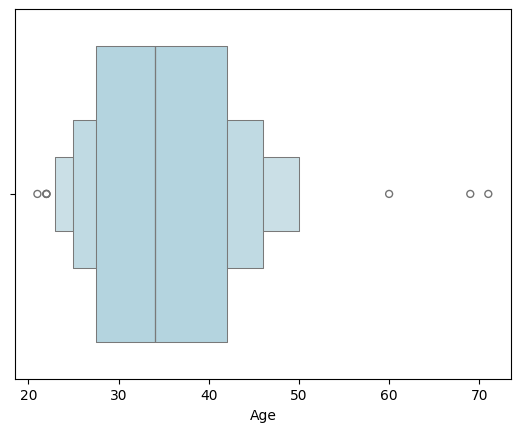

In [166]:
sns.boxenplot(x=df['Age'], color='lightblue')
plt.show()

In [175]:
#: Remove rows where scores are outside a reasonable range
df = df[(df['Age'] >= 18) & (df['Age'] <= 60)]

In [176]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,HighSchool,122,91.0,80
5,Hannah,Hansen,25,Female,Norge,BI Residence,66,HighSchool,130,88.0,59
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


In [167]:
# detect outliers manually
q1 = df['studyHOURS'].quantile(0.25)
q3 = df['studyHOURS'].quantile(0.75)
IQR = q3 - q1
IQR

wisk_min = q1 - 1.5 * IQR
wisk_max = q3 + 1.5 * IQR

df[(df['studyHOURS'] < wisk_min) | (df['studyHOURS'] > wisk_max)]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,HighSchool,122,91.0,80
20,Prof,Birkeland,22,Male,Norway,BI Residence,45,HighSchool,116,33.0,30
21,Hanna,Isaksen,24,Female,Norway,BI Residence,50,HighSchool,114,30.0,50
32,Perry,Rønning,71,Female,Norway,Private,30,Doctorate,120,31.0,42
49,Thea,Knutsen,28,Male,Norway,BI Residence,69,HighSchool,120,45.0,70
53,Chinedu,Morison,36,Male,Nigeria,Private,28,Diploma,120,15.0,67


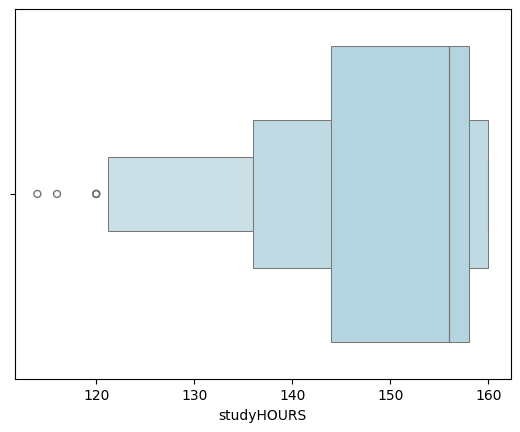

In [168]:
sns.boxenplot(x=df['studyHOURS'], color='lightblue')
plt.show()

In [177]:
#: Remove rows where scores are outside a reasonable range
df = df[(df['studyHOURS'] >= 122) & (df['studyHOURS'] <= 160)]

In [178]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,HighSchool,122,91.0,80
5,Hannah,Hansen,25,Female,Norge,BI Residence,66,HighSchool,130,88.0,59
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


In [169]:
df['Python'].describe()

count    75.000000
mean     75.853333
std      15.410328
min      15.000000
25%      71.000000
50%      81.000000
75%      85.000000
max      91.000000
Name: Python, dtype: float64

In [170]:
# detect outliers manually
q1 = df['Python'].quantile(0.25)
q3 = df['Python'].quantile(0.75)
IQR = q3 - q1
IQR

wisk_min = q1 - 1.5 * IQR
wisk_max = q3 + 1.5 * IQR

df[(df['Python'] < wisk_min) | (df['Python'] > wisk_max)]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
20,Prof,Birkeland,22,Male,Norway,BI Residence,45,HighSchool,116,33.0,30
21,Hanna,Isaksen,24,Female,Norway,BI Residence,50,HighSchool,114,30.0,50
32,Perry,Rønning,71,Female,Norway,Private,30,Doctorate,120,31.0,42
48,Jenny,Kristoffersen,26,Female,Norway,BI Residence,68,HighSchool,124,48.0,62
49,Thea,Knutsen,28,Male,Norway,BI Residence,69,HighSchool,120,45.0,70
53,Chinedu,Morison,36,Male,Nigeria,Private,28,Diploma,120,15.0,67


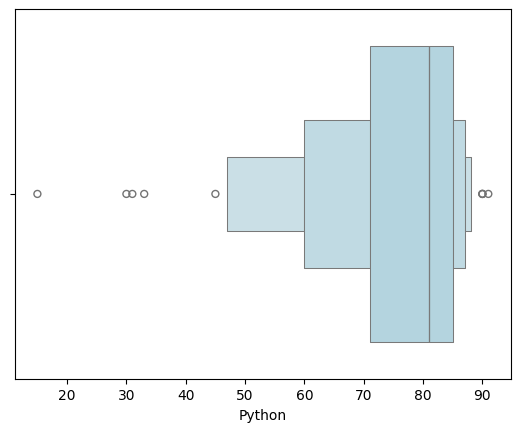

In [171]:
sns.boxenplot(x=df['Python'], color='lightblue')
plt.show()

In [179]:
#: Remove rows where scores are outside a reasonable range
df = df[(df['Python'] >= 49) & (df['Python'] <= 90)]

In [180]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
5,Hannah,Hansen,25,Female,Norge,BI Residence,66,HighSchool,130,88.0,59
6,Ole,Johansen,27,Male,Norway,BI-Residence,90,Bachelors,156,80.0,91
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


In [172]:
# detect outliers manually
q1 = df['DB'].quantile(0.25)
q3 = df['DB'].quantile(0.75)
IQR = q3 - q1
IQR

wisk_min = q1 - 1.5 * IQR
wisk_max = q3 + 1.5 * IQR

df[(df['DB'] < wisk_min) | (df['DB'] > wisk_max)]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB


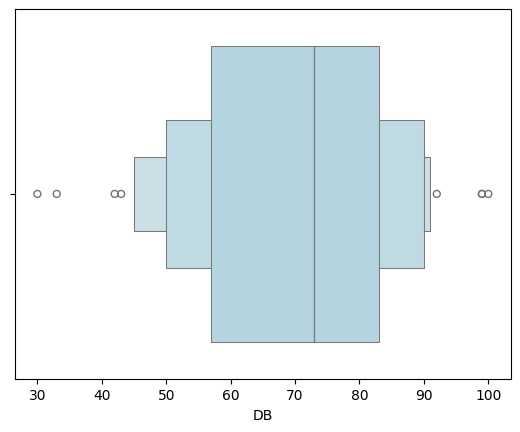

In [173]:
sns.boxenplot(x=df['DB'], color='lightblue')
plt.show()

In [181]:
#: Remove rows where scores are outside a reasonable range
df = df[(df['DB'] >= 48) & (df['DB'] <= 90)]

In [183]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
5,Hannah,Hansen,25,Female,Norge,BI Residence,66,HighSchool,130,88.0,59
7,Lars,Olsen,29,Male,norway,BIResidence,89,Bachelors,160,85.0,60
8,Bjørn,Larsen,31,Male,Norway,BI Residence,88,Bachelors,156,80.0,89
9,Sofie,Jensen,33,Female,Denmark,BI_Residence,85,Bachelors,160,83.0,90
10,Emma,de Vries,34,Female,Netherlands,BI Residence,65,Bachelors,156,79.0,58
11,Solveig,Eliassen,36,Female,Norway,Private,70,Diploma,156,80.0,55
13,Grethe,Myklebust,40,Female,Norway,Private,77,Diploma,144,70.0,76


# Feature Engineering

In [184]:
# Create a new feature: Programming Average = (Python + DB)/2.
df['Programming_Average'] = (df['Python'] + df['DB']) / 2
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_34384\161162436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Programming_Average'] = (df['Python'] + df['DB']) / 2


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Average
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75,67.5
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50,62.0
5,Hannah,Hansen,25,Female,Norge,BI Residence,66,HighSchool,130,88.0,59,73.5
7,Lars,Olsen,29,Male,norway,BIResidence,89,Bachelors,160,85.0,60,72.5
8,Bjørn,Larsen,31,Male,Norway,BI Residence,88,Bachelors,156,80.0,89,84.5
9,Sofie,Jensen,33,Female,Denmark,BI_Residence,85,Bachelors,160,83.0,90,86.5
10,Emma,de Vries,34,Female,Netherlands,BI Residence,65,Bachelors,156,79.0,58,68.5
11,Solveig,Eliassen,36,Female,Norway,Private,70,Diploma,156,80.0,55,67.5
13,Grethe,Myklebust,40,Female,Norway,Private,77,Diploma,144,70.0,76,73.0


In [185]:
# detect outliers manually
q1 = df['Programming_Average'].quantile(0.25)
q3 = df['Programming_Average'].quantile(0.75)
IQR = q3 - q1
IQR

wisk_min = q1 - 1.5 * IQR
wisk_max = q3 + 1.5 * IQR

df[(df['Programming_Average'] < wisk_min) | (df['Programming_Average'] > wisk_max)]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Average


In [186]:
# Create a binary feature: isAdult = 1 if Age >= 25, else 0.
df['isAdult'] = (df['Age'] >= 25).astype(int)
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_34384\637719261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isAdult'] = (df['Age'] >= 25).astype(int)


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Average,isAdult
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0,1
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75,67.5,1
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50,62.0,1
5,Hannah,Hansen,25,Female,Norge,BI Residence,66,HighSchool,130,88.0,59,73.5,1
7,Lars,Olsen,29,Male,norway,BIResidence,89,Bachelors,160,85.0,60,72.5,1
8,Bjørn,Larsen,31,Male,Norway,BI Residence,88,Bachelors,156,80.0,89,84.5,1
9,Sofie,Jensen,33,Female,Denmark,BI_Residence,85,Bachelors,160,83.0,90,86.5,1
10,Emma,de Vries,34,Female,Netherlands,BI Residence,65,Bachelors,156,79.0,58,68.5,1
11,Solveig,Eliassen,36,Female,Norway,Private,70,Diploma,156,80.0,55,67.5,1
13,Grethe,Myklebust,40,Female,Norway,Private,77,Diploma,144,70.0,76,73.0,1


In [ ]:
# perform applay function
# Transform studyHOURS into categories (Low / Medium / High).
def categorize_study_hours(hours):
    if hours < 130:
        return 'Low'
    elif 130 <= hours < 150:
        return 'Medium'
    else:
        return 'High'

df['Study_Hours_Category'] = df['studyHOURS'].apply(categorize_study_hours)
df['Study_Hours_Category'].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_34384\3062683457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Study_Hours_Category'] = df['studyHOURS'].apply(categorize_study_hours)


Study_Hours_Category
High      41
Medium    13
Name: count, dtype: int64

In [189]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Average,isAdult,Study_Hours_Category
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0,1,High
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75,67.5,1,High
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50,62.0,1,Medium
5,Hannah,Hansen,25,Female,Norge,BI Residence,66,HighSchool,130,88.0,59,73.5,1,Medium
7,Lars,Olsen,29,Male,norway,BIResidence,89,Bachelors,160,85.0,60,72.5,1,High
8,Bjørn,Larsen,31,Male,Norway,BI Residence,88,Bachelors,156,80.0,89,84.5,1,High
9,Sofie,Jensen,33,Female,Denmark,BI_Residence,85,Bachelors,160,83.0,90,86.5,1,High
10,Emma,de Vries,34,Female,Netherlands,BI Residence,65,Bachelors,156,79.0,58,68.5,1,High
11,Solveig,Eliassen,36,Female,Norway,Private,70,Diploma,156,80.0,55,67.5,1,High
13,Grethe,Myklebust,40,Female,Norway,Private,77,Diploma,144,70.0,76,73.0,1,Medium


# Feature Scaling

In [190]:
# Detect Numeric Columns
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['Age', 'entryEXAM', 'studyHOURS', 'Python', 'DB', 'Programming_Average',
       'isAdult'],
      dtype='object')